In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
import matplotlib.pyplot as plt
import numpy as np

files = {
    'F090W':    'data/jw02732-o001_t001_nircam_clear-f090w_i2d.fits',
    'F150M':    'data/jw02732-o001_t001_nircam_clear-f150w_i2d.fits',
    'F200M':    'data/jw02732-o001_t001_nircam_clear-f200w_i2d.fits',
    'F277M':    'data/jw02732-o001_t001_nircam_clear-f277w_i2d.fits',
    'F356M':    'data/jw02732-o001_t001_nircam_clear-f356w_i2d.fits',
    'F444M':    'data/jw02732-o001_t001_nircam_clear-f444w_i2d.fits'
    # 'F770W1':   'data/jw02732-o002_t001_miri_f770w_i2d.fits',
    # 'F1000W1':  'data/jw02732-o002_t001_miri_f1000w_i2d.fits'
}

Set DATE-AVG to '2022-06-11T20:36:20.627' from MJD-AVG.
Set DATE-END to '2022-06-12T01:13:06.238' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.294485 from OBSGEO-[XYZ].
Set OBSGEO-H to 1698349904.538 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


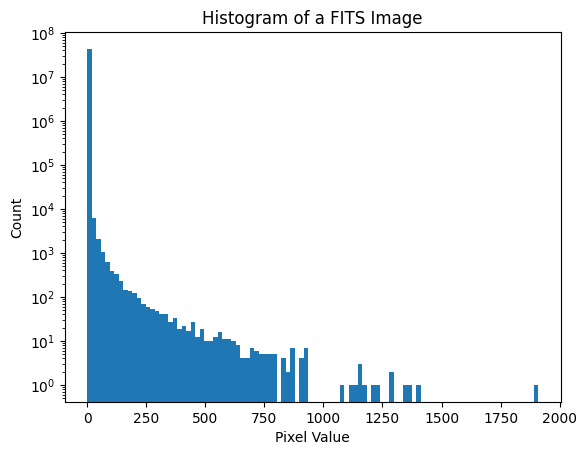

Reference Shape: (12369, 14422)


In [2]:
# Select a reference image (largest one for best quality)
reference = files['F090W']

hdul = fits.open(reference)
ref_data = hdul['SCI'].data
ref_wcs = WCS(hdul['SCI'].header) # WCS = World Coordinate System
ref_shape = ref_data.shape

ref_data[ref_data < 0] = 0

# Downsample by taking every 10th pixel
sampled = ref_data[::2, ::2].flatten()

# Plot histogram
plt.hist(sampled, bins=100, log=True)
plt.xlabel("Pixel Value")
plt.ylabel("Count")
plt.title("Histogram of a FITS Image")
plt.show()

print("Reference Shape:", ref_shape)

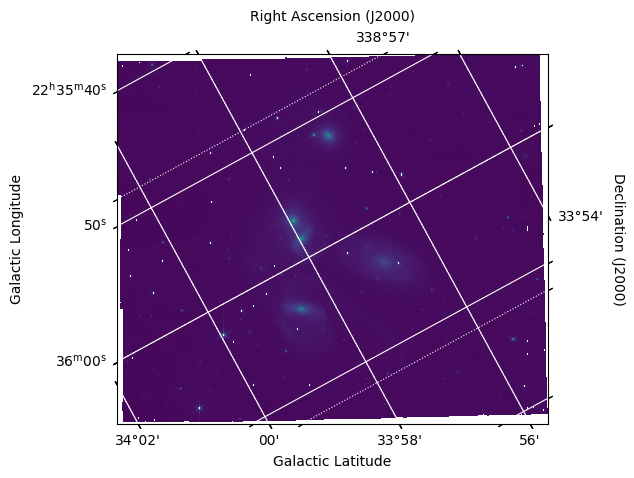

In [3]:
# Show WCS
ax = plt.subplot(projection=ref_wcs, label='overlays')

ax.imshow(np.asinh(ref_data.data), origin='lower')

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

In [4]:
# If you don't have enough RAM to process the files, you can scale the image down
#scale = 0.7  # Scale factor
#ref_shape = (int(ref_shape[0] * scale), int(ref_shape[1] * scale))

In [5]:
# Note that the original file is reprojected with itself in case you used scaling
for key, source_path in files.items():
    with fits.open(source_path) as hdul:
        source_data = hdul['SCI'].data
        source_wcs = WCS(hdul['SCI'].header)

    # Do the reprojection
    reproj_data, _ = reproject_interp((source_data, source_wcs), ref_wcs, shape_out=ref_shape)

    # Save the result
    fits.writeto(f"reprojected/{key}.fits", reproj_data, ref_wcs.to_header(), overwrite=True)

Set DATE-AVG to '2022-06-11T20:36:20.627' from MJD-AVG.
Set DATE-END to '2022-06-12T01:13:06.238' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.294485 from OBSGEO-[XYZ].
Set OBSGEO-H to 1698349904.538 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-11T21:10:27.249' from MJD-AVG.
Set DATE-END to '2022-06-12T01:47:06.236' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.301291 from OBSGEO-[XYZ].
Set OBSGEO-H to 1698458271.598 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-11T21:44:35.306' from MJD-AVG.
Set DATE-END to '2022-06-12T02:21:27.738' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.308128 from OBSGEO-[XYZ].
Set OBSGEO-H to 1698567028.021 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-06-11T20:36:20.644' from MJD-AVG.
Set DATE-END to '2022-06-12T01:13:06.238' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -34.294485 from OBSGEO-[XYZ].
Set OBSGEO-H to 1698349907.940 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE